In [100]:
import numpy as np
import pandas as pd

# maps
import geopandas as gpd
from geopandas import GeoDataFrame
import polyline
from shapely.geometry import Point, LineString, MultiLineString

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy
from collections import Counter
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
traffic_18_m = pd.read_csv('traffic_18_m.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
traffic_18_m = traffic_18_m.drop(['Unnamed: 0', 'index'],1)
traffic_18_m.head()

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,LINK_POINTS,ENCODED_POLY_LINE,ENCODED_POLY_LINE_LVLS,OWNER,...,Join_ID,weekend,morn_rush_hr,eve_rush_hr,morning_rush_avg_spd,evening_rush_avg_spd,wknd_avg_spd,overall_avg_spd,overall_std_speed,speed_index
0,423,47.22,113,0,2018-12-31 23:58:23,4616299,"40.7624804,-73.839391 40.76191,-73.839121 40.7...",olxwFdwtaMpBu@jAg@|@Yr@MdAGhA@dH\~@E|@GbMoAbCa...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,...,4474001042223,0,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0
1,423,47.84,112,0,2018-12-31 23:53:22,4616299,"40.7624804,-73.839391 40.76191,-73.839121 40.7...",olxwFdwtaMpBu@jAg@|@Yr@MdAGhA@dH\~@E|@GbMoAbCa...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,...,4474001042223,0,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0
2,423,47.84,112,0,2018-12-31 23:48:24,4616299,"40.7624804,-73.839391 40.76191,-73.839121 40.7...",olxwFdwtaMpBu@jAg@|@Yr@MdAGhA@dH\~@E|@GbMoAbCa...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,...,4474001042223,0,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0
3,423,46.60,115,0,2018-12-31 23:43:23,4616299,"40.7624804,-73.839391 40.76191,-73.839121 40.7...",olxwFdwtaMpBu@jAg@|@Yr@MdAGhA@dH\~@E|@GbMoAbCa...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,...,4474001042223,0,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0
4,423,45.36,118,0,2018-12-31 23:38:24,4616299,"40.7624804,-73.839391 40.76191,-73.839121 40.7...",olxwFdwtaMpBu@jAg@|@Yr@MdAGhA@dH\~@E|@GbMoAbCa...,BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,...,4474001042223,0,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0


In [76]:
traffic_18_m['DATA_AS_OF'] = pd.DatetimeIndex(traffic_18_m['DATA_AS_OF'])

In [77]:
traffic_sample = traffic_18_m.loc[(traffic_18_m['DATA_AS_OF']>'2018-5-13')&(traffic_18_m['DATA_AS_OF']<'2018-5-20')]

traffic_sample = traffic_sample.drop(columns=['LINK_POINTS','ENCODED_POLY_LINE','ENCODED_POLY_LINE_LVLS','TRANSCOM_ID','Join_ID'])

In [78]:
traffic_sample['DATA_AS_OF']

63801      2018-05-19 23:58:09
63802      2018-05-19 23:53:09
63803      2018-05-19 23:48:09
63804      2018-05-19 23:43:09
63805      2018-05-19 23:38:09
63806      2018-05-19 23:33:08
63807      2018-05-19 23:28:09
63808      2018-05-19 23:23:09
63809      2018-05-19 23:18:09
63810      2018-05-19 23:12:08
63811      2018-05-19 23:07:09
63812      2018-05-19 23:02:09
63813      2018-05-19 22:57:09
63814      2018-05-19 22:52:09
63815      2018-05-19 22:47:10
63816      2018-05-19 22:42:09
63817      2018-05-19 22:37:10
63818      2018-05-19 22:33:08
63819      2018-05-19 22:28:09
63820      2018-05-19 22:23:10
63821      2018-05-19 22:18:10
63822      2018-05-19 22:13:08
63823      2018-05-19 22:08:09
63824      2018-05-19 22:03:09
63825      2018-05-19 21:58:09
63826      2018-05-19 21:53:09
63827      2018-05-19 21:48:09
63828      2018-05-19 21:43:09
63829      2018-05-19 21:38:10
63830      2018-05-19 21:33:08
                   ...        
13308390   2018-05-13 02:28:03
13308391

In [80]:
traffic_sample.columns

Index(['ID', 'SPEED', 'TRAVEL_TIME', 'STATUS', 'DATA_AS_OF', 'LINK_ID',
       'OWNER', 'BOROUGH', 'LINK_NAME', 'year', 'month', 'dayofweek',
       'RecordedAtTime', 'hour', 'minute', 'poly_num', 'LINK_START',
       'LINK_END', 'LINK_MIDDLE', 'speed_id', 'speed_limit', 'lion_id',
       'Street', 'FeatureTyp', 'SegmentTyp', 'RB_Layer', 'NonPed', 'TrafDir',
       'SeqNum', 'StreetCode', 'StreetWidt', 'BikeLane', 'Snow_Prior',
       'Number_Tra', 'Number_Tot', 'weekend', 'morn_rush_hr', 'eve_rush_hr',
       'morning_rush_avg_spd', 'evening_rush_avg_spd', 'wknd_avg_spd',
       'overall_avg_spd', 'overall_std_speed', 'speed_index'],
      dtype='object')

In [95]:
traffic_sample['unix_time'] = pd.DatetimeIndex(traffic_sample['DATA_AS_OF'])

In [96]:
traffic_sample['unix_time'] = traffic_sample['unix_time'].astype(np.int64)

In [97]:
traffic_sample['unix_time'].head()

63801    1526774289000000000
63802    1526773989000000000
63803    1526773689000000000
63804    1526773389000000000
63805    1526773089000000000
Name: unix_time, dtype: int64

In [84]:
traffic_sample['unix_time'].max()

1557359891000000000

In [98]:
traffic_sm = traffic_sample.sample(50000, random_state=1)

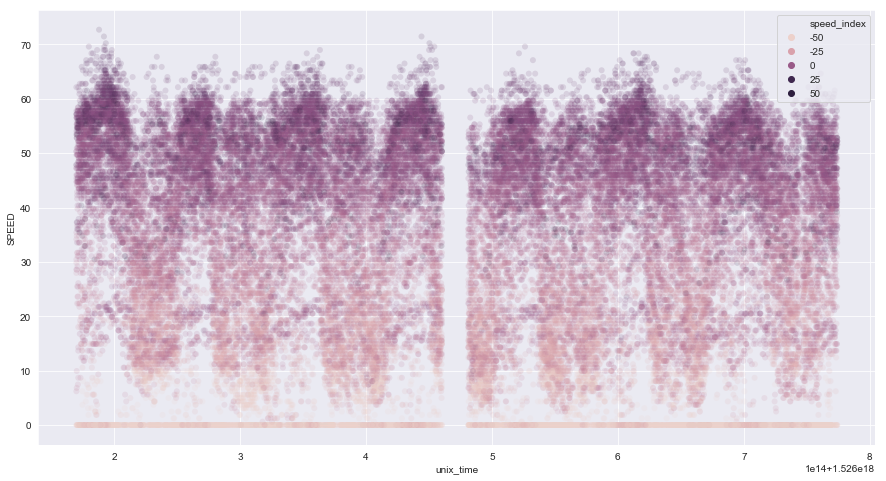

In [99]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='unix_time', y='SPEED', hue='speed_index',
                linewidth=0, data=traffic_sm, alpha=.15)
plt.show()

In [18]:
traffic_sample.columns

Index(['ID', 'SPEED', 'TRAVEL_TIME', 'STATUS', 'DATA_AS_OF', 'LINK_ID',
       'OWNER', 'BOROUGH', 'LINK_NAME', 'year', 'month', 'dayofweek',
       'RecordedAtTime', 'hour', 'minute', 'poly_num', 'LINK_START',
       'LINK_END', 'LINK_MIDDLE', 'speed_id', 'speed_limit', 'lion_id',
       'Street', 'FeatureTyp', 'SegmentTyp', 'RB_Layer', 'NonPed', 'TrafDir',
       'SeqNum', 'StreetCode', 'StreetWidt', 'BikeLane', 'Snow_Prior',
       'Number_Tra', 'Number_Tot', 'weekend', 'morn_rush_hr', 'eve_rush_hr',
       'morning_rush_avg_spd', 'evening_rush_avg_spd', 'wknd_avg_spd',
       'overall_avg_spd', 'overall_std_speed', 'speed_index', 'unix_time'],
      dtype='object')

In [90]:
traffic_sm['rush_hr'] = np.where(traffic_sm['morn_rush_hr'] == 1,'Morning',
                                np.where(traffic_sm['eve_rush_hr'] == 1,'Evening','None'))

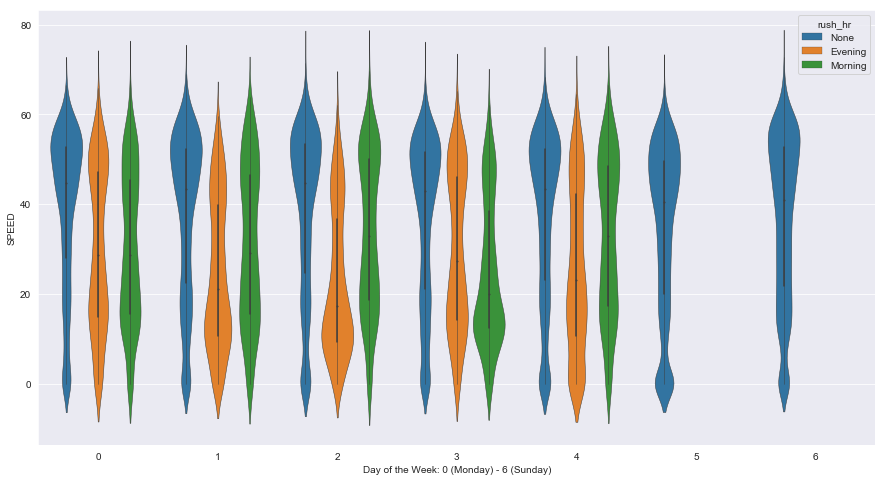

In [91]:
# Weekday doesn't seem to affect the bus all that much
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sm, hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

In [44]:
traffic_sample[['LINK_ID','overall_std_speed']].groupby('LINK_ID')['overall_std_speed'].max().sort_values(ascending=False)

LINK_ID
4616267    22.137909
4616209    20.720959
4620298    20.512193
4620331    20.321461
4616309    19.453849
4620332    19.325636
4616319    19.146264
4616229    19.142689
4616255    19.117366
4616201    19.113256
4616195    18.984539
4329483    18.935976
4616281    18.576661
4616346    18.534336
4616213    18.528598
4616310    18.257673
4620343    17.997614
4362342    17.554910
4616351    17.414207
4616223    16.520600
4616364    16.391624
4616318    16.348338
4329473    16.285458
4616197    16.278202
4362314    16.204312
4616199    16.120648
4616232    16.098094
4616355    15.899708
4616202    15.899555
4616208    15.760095
             ...    
4456452    11.066615
4616250    11.028576
4616312    10.910351
4456483    10.839617
4616225    10.770372
4616247    10.414094
4616246    10.406435
4616357    10.382226
4616204    10.228272
4763657     9.862680
4616297     9.698630
4616342     9.623591
4616226     9.331354
4456505     9.301289
4456450     9.192795
4456497     9.141894
46163

In [105]:
traffic_sample['rush_hr'] = np.where(traffic_sample['morn_rush_hr'] == 1,'Morning',
                                     np.where(traffic_sample['eve_rush_hr'] == 1,'Evening','None'))

#### With the Highest Standard Deviation

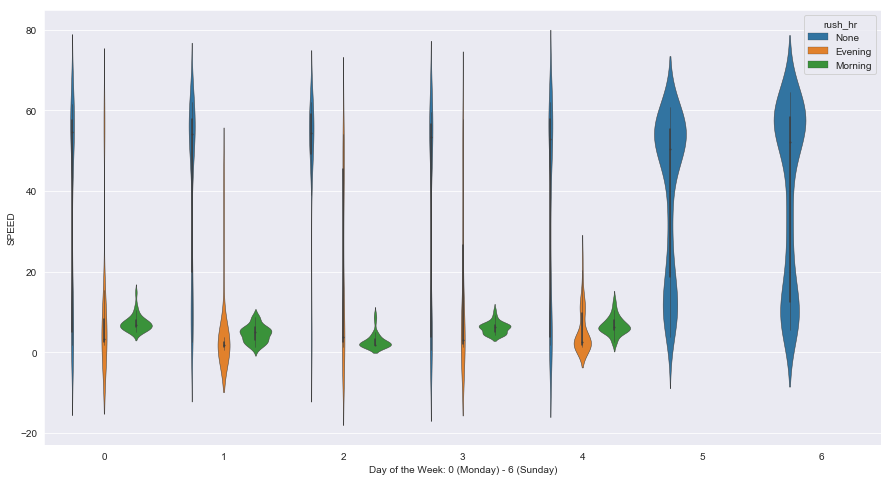

In [109]:
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4616267], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

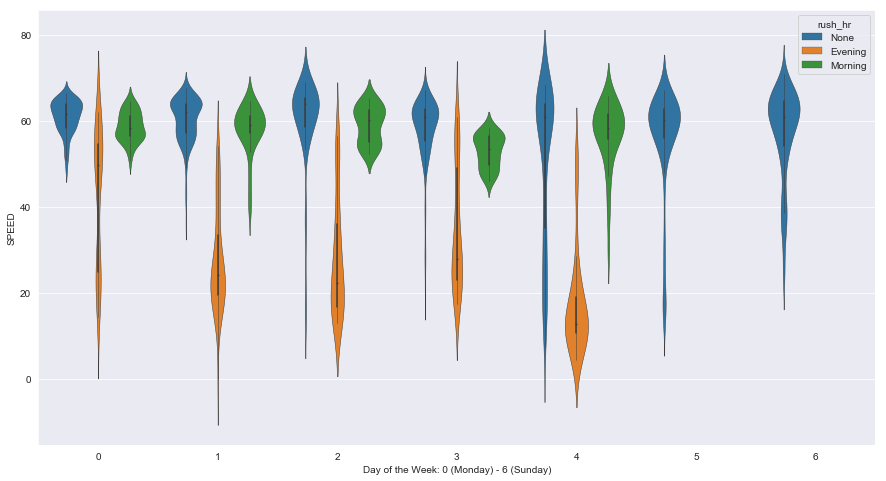

In [110]:

plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4616209], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

#### With the Smallest Standard Deviation

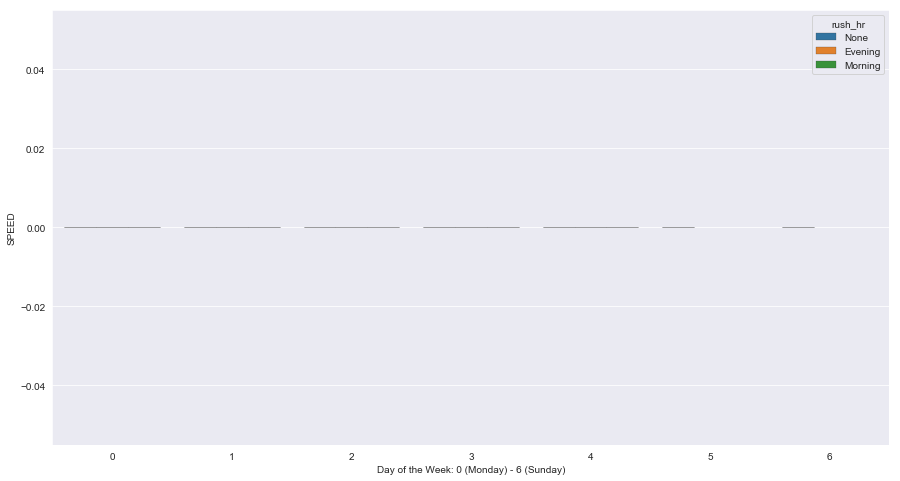

In [113]:
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4456478], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

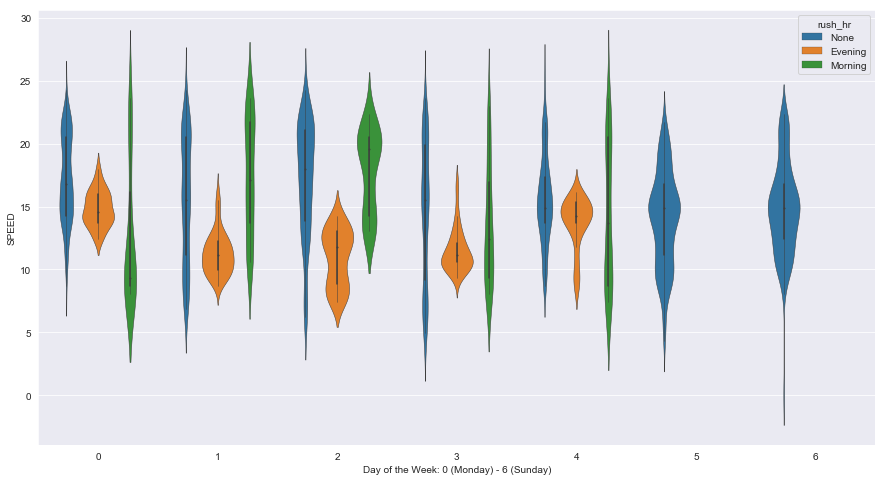

In [112]:
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4616324], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

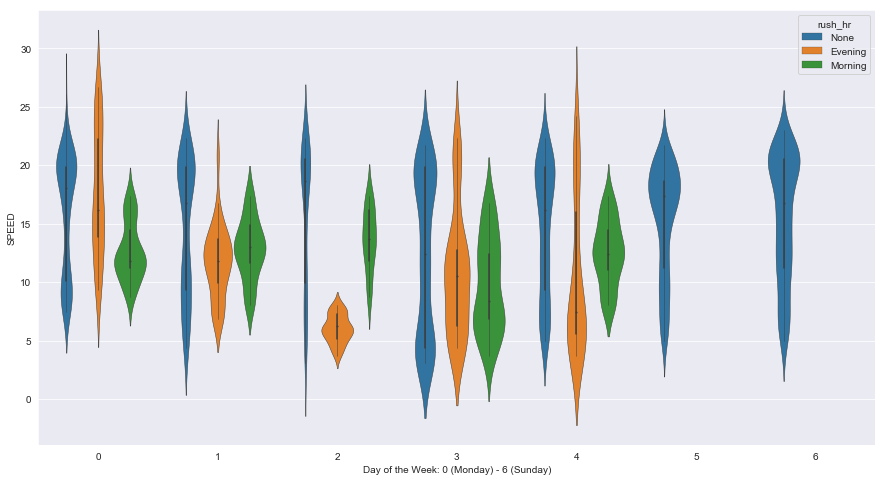

In [114]:
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4616337], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x='dayofweek', y='SPEED', data=traffic_sample.loc[traffic_sample.LINK_ID==4616337], hue='rush_hr',linewidth=.5) #bw=.5
plt.xlabel(('Day of the Week: 0 (Monday) - 6 (Sunday)'))
plt.show()

In [52]:
traffic_sample.columns

Index(['ID', 'SPEED', 'TRAVEL_TIME', 'STATUS', 'DATA_AS_OF', 'LINK_ID',
       'OWNER', 'BOROUGH', 'LINK_NAME', 'year', 'month', 'dayofweek',
       'RecordedAtTime', 'hour', 'minute', 'poly_num', 'LINK_START',
       'LINK_END', 'LINK_MIDDLE', 'speed_id', 'speed_limit', 'lion_id',
       'Street', 'FeatureTyp', 'SegmentTyp', 'RB_Layer', 'NonPed', 'TrafDir',
       'SeqNum', 'StreetCode', 'StreetWidt', 'BikeLane', 'Snow_Prior',
       'Number_Tra', 'Number_Tot', 'weekend', 'morn_rush_hr', 'eve_rush_hr',
       'morning_rush_avg_spd', 'evening_rush_avg_spd', 'wknd_avg_spd',
       'overall_avg_spd', 'overall_std_speed', 'speed_index', 'unix_time',
       'rush_hr'],
      dtype='object')

In [54]:
traffic_sample['dayofweek'].value_counts()

4    1935368
0    1924719
3    1923812
1    1914691
2    1904496
5    1896229
6    1846029
Name: dayofweek, dtype: int64

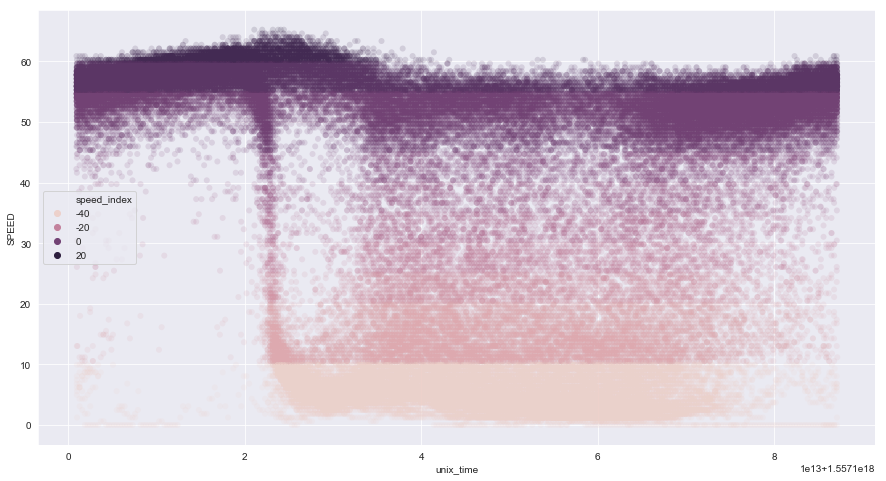

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='unix_time', y='SPEED', hue='speed_index',
                linewidth=0, data=traffic_sample.loc[traffic_sample.LINK_ID==4616267], alpha=.15)
plt.show()

#### 

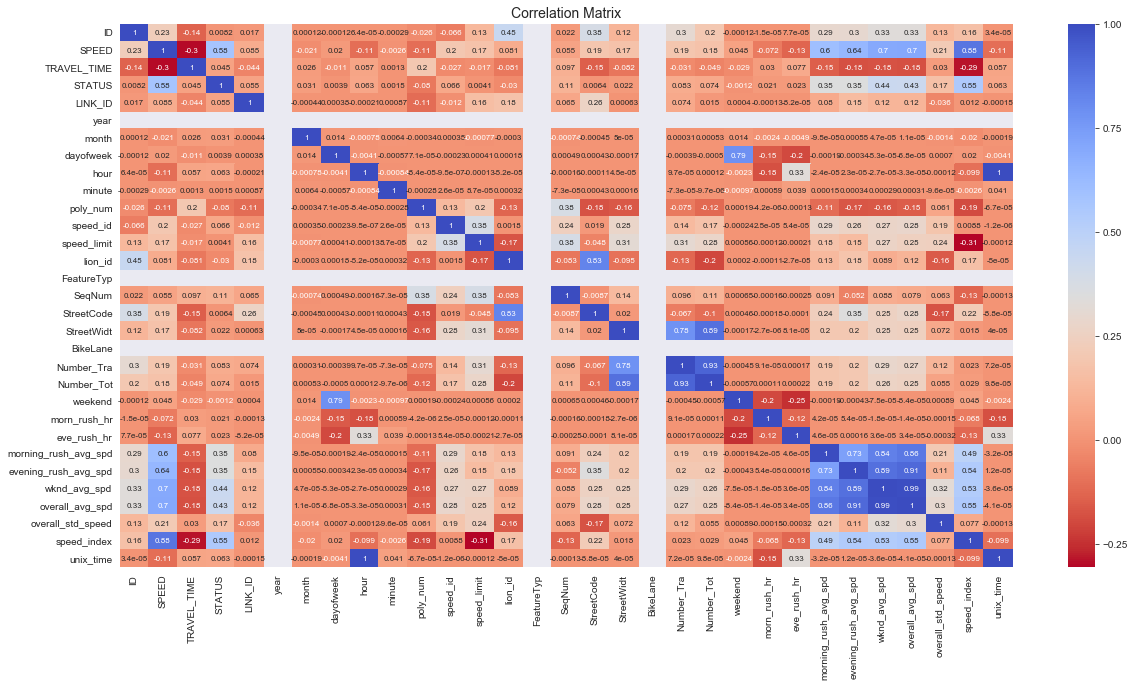

In [57]:
plt.figure(figsize=(20,10))
sample_corr = traffic_sample.corr()
sns.heatmap(sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8})
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [68]:
traffic_18_m.loc[(traffic_18_m['DATA_AS_OF']<'2018-5-20')&(traffic_18_m['DATA_AS_OF']>'2018-5-13')]

,ID,SPEED,TRAVEL_TIME,STATUS,DATA_AS_OF,LINK_ID,OWNER,BOROUGH,LINK_NAME,year,...,morn_rush_hr,eve_rush_hr,morning_rush_avg_spd,evening_rush_avg_spd,wknd_avg_spd,overall_avg_spd,overall_std_speed,speed_index,unix_time,rush_hr
0,423,47.22,113,0,2018-12-31 23:58:23,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557187103000000000,None
1,423,47.84,112,0,2018-12-31 23:53:22,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557186802000000000,None
2,423,47.84,112,0,2018-12-31 23:48:24,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557186504000000000,None
3,423,46.60,115,0,2018-12-31 23:43:23,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557186203000000000,None
4,423,45.36,118,0,2018-12-31 23:38:24,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557185904000000000,None
5,423,46.60,114,0,2018-12-31 23:33:23,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557185603000000000,None
6,423,45.98,117,0,2018-12-31 23:28:23,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557185303000000000,None
7,423,45.36,118,0,2018-12-31 23:23:24,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557185004000000000,None
8,423,45.36,117,0,2018-12-31 23:18:24,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557184704000000000,None
9,423,45.36,117,0,2018-12-31 23:13:24,4616299,NYC_DOT_LIC,Queens,VWE N MP6.39 (Exit 11 Jewel Ave) - MP8.65 (Exi...,2018,...,0,0,40.762976,34.937478,49.801891,46.591828,11.256594,0,1557184404000000000,None
